## K-Nearest Neighbours

### Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix 

### Prepare data

In [2]:
train_features = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')

test_features = pd.read_csv('test_features.csv')
test_labels = pd.read_csv('test_labels.csv')

Survived = ['Not survived','Survived']

### Train model

#### Optimize the K-Nearest Neighbours Model

In [3]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))
        
knn = KNeighborsClassifier()
parameters = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
}

cv = GridSearchCV(knn, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

best_knn=cv.best_estimator_

BEST PARAMS: {'n_neighbors': 3}

0.722 (+/-0.026) for {'n_neighbors': 3}
0.701 (+/-0.045) for {'n_neighbors': 5}
0.702 (+/-0.031) for {'n_neighbors': 7}
0.687 (+/-0.035) for {'n_neighbors': 9}
0.685 (+/-0.03) for {'n_neighbors': 11}
0.687 (+/-0.041) for {'n_neighbors': 13}
0.678 (+/-0.052) for {'n_neighbors': 15}


### Test Model

#### Visualize the Confusion Matrix

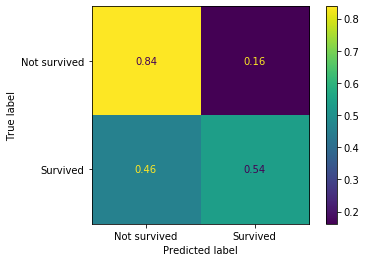

In [4]:
plot_confusion_matrix(
    best_knn, test_features, test_labels,
    display_labels=Survived,
    normalize='true')

#### Caluate the accuracy of the test data

In [5]:
print(
    'Accuracy on testing data: ' 
    + str("{:.2%}".format(best_knn.score(test_features, test_labels))))

Accuracy on testing data: 71.51%
